<h1>Sec. 4 Lab exercise 1: Understanding the recent past</h1>

In [2]:
import ec3
import pandas as pd
import seaborn as sns
import matplotlib as mpl
mpl.rc('font', size = 12)
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats

   Mes  Día  Anio      Date  MeanTemp
0    1    1  1971  1971-1-1      13.0
1    1    2  1971  1971-1-2      13.5
2    1    3  1971  1971-1-3      14.0
3    1    4  1971  1971-1-4      12.5
4    1    5  1971  1971-1-5      13.0
       Mes  Día  Anio        Date  MeanTemp
16431   12   27  2015  2015-12-27      17.0
16432   12   28  2015  2015-12-28      17.5
16433   12   29  2015  2015-12-29      16.5
16434   12   30  2015  2015-12-30      17.5
16435   12   31  2015  2015-12-31      16.0


<AxesSubplot:>

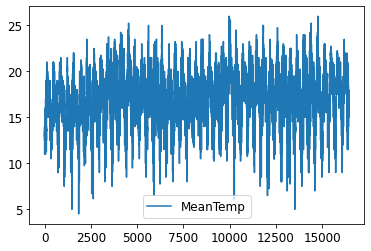

In [3]:
csuc = pd.read_csv("9014-COLONIA SANTA URSULA COAPA-DF-Tprom.csv")
print(csuc.head())
print(csuc.tail())
csuc_MeanTemp = csuc[['Date', 'MeanTemp']]
csuc_MeanTemp.plot()

In [4]:
csuc.Date = pd.to_datetime(csuc.Date)

In [5]:
csuc_ext = csuc.copy()[['Date', 'MeanTemp']]
csuc_ext['HDDObs'] = csuc_ext.MeanTemp.apply(lambda x: 0 if x >= 18 else 18 - x)
csuc_ext['CDDObs'] = csuc_ext.MeanTemp.apply(lambda x: 0 if x <= 18 else x - 18)
print(csuc_ext.head())
print(csuc_ext.tail())

        Date  MeanTemp  HDDObs  CDDObs
0 1971-01-01      13.0     5.0     0.0
1 1971-01-02      13.5     4.5     0.0
2 1971-01-03      14.0     4.0     0.0
3 1971-01-04      12.5     5.5     0.0
4 1971-01-05      13.0     5.0     0.0
            Date  MeanTemp  HDDObs  CDDObs
16431 2015-12-27      17.0     1.0     0.0
16432 2015-12-28      17.5     0.5     0.0
16433 2015-12-29      16.5     1.5     0.0
16434 2015-12-30      17.5     0.5     0.0
16435 2015-12-31      16.0     2.0     0.0


In [6]:
csuc['HDD'] = csuc.MeanTemp.apply(lambda x: 0 if x >= 18 else 18 - x)
csuc['CDD'] = csuc.MeanTemp.apply(lambda x: 0 if x <= 18 else x - 18)

In [7]:
csuc['Year'] = csuc.Date.apply(lambda x: x.year + 1 if x.month == 12 else x.year)

In [8]:
csuc_hdd = csuc[csuc.Year.isin(range(1972, 2015)) & csuc.Date.dt.month.isin([12, 1, 2])][['Year', 'HDD']].groupby('Year').sum().reset_index()
csuc_cdd = csuc[csuc.Year.isin(range(1971, 2016)) & csuc.Date.dt.month.isin([6, 7, 8])][['Year', 'CDD']].groupby('Year').sum().reset_index()
print(csuc_hdd.head())
print(csuc_hdd.tail())
print(csuc_cdd.head())
print(csuc_cdd.tail())

   Year         HDD
0  1972  386.000000
1  1973  454.000000
2  1974  554.000000
3  1975  456.998248
4  1976  508.500000
    Year         HDD
38  2010  313.993969
39  2011  341.499993
40  2012  380.750000
41  2013  301.750000
42  2014  317.497799
   Year   CDD
0  1971  21.0
1  1972  13.5
2  1973  14.5
3  1974   8.5
4  1975   1.0
    Year     CDD
40  2011  183.75
41  2012  109.25
42  2013  113.25
43  2014  127.75
44  2015  166.25


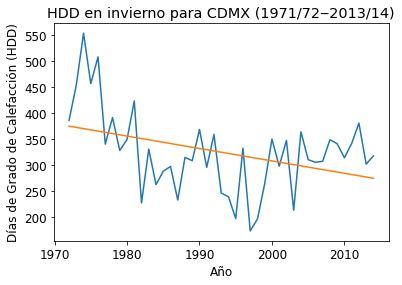

In [9]:
plt.plot(csuc_hdd.Year, csuc_hdd.HDD)
plt.plot(csuc_hdd.Year, np.polyval(np.polyfit(csuc_hdd.Year, csuc_hdd.HDD, 1), csuc_hdd.Year))
plt.title("HDD en invierno para CDMX (1971/72‒2013/14)")
plt.xlabel("Año")
plt.ylabel("Días de Grado de Calefacción (HDD)")
plt.savefig('hdd_csuc.png')

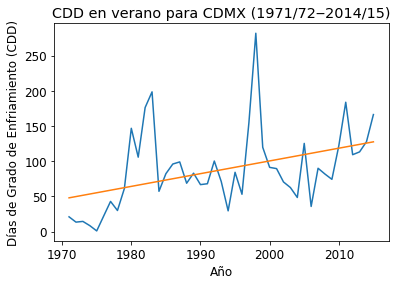

In [10]:
plt.plot(csuc_cdd.Year, csuc_cdd.CDD)
plt.plot(csuc_cdd.Year, np.polyval(np.polyfit(csuc_cdd.Year, csuc_cdd.CDD, 1), csuc_cdd.Year))
plt.title("CDD en verano para CDMX (1971/72‒2014/15)")
plt.xlabel("Año")
plt.ylabel("Días de Grado de Enfriamiento (CDD)")
plt.savefig('cdd_csuc.png')

In [11]:
def test_trends(years, values):
    slope, intercept, r_value, p_value, std_err = stats.linregress(years, values)
    print("The regression coefficients are", np.round(slope, 3), "for the slope and",
          np.round(intercept, 1), "for the intercept\n")

    t_crit = stats.t.ppf(0.975, len(years) - 1)
    confidence_interval = t_crit * std_err
    print("The true value of the slope is then", np.round(slope, 3), "+/-",
          np.round(confidence_interval, 3),"\n")

    pearsons_corrcoef, p_corr = stats.pearsonr(years,  values)
    levels = [0.001, 0.01, 0.05, 0.1]
    lvl = [i for i in levels if p_corr < i]
    print("The correlation is", np.round(pearsons_corrcoef, 3), "with a p-value of",
          np.round(p_corr, 5), "(not significant)\n" if lvl == [] else
          "(significant at the " + str(min(lvl)) + " level)\n")

    print("The variance in", values.name, "explained by the linear trend is",
          "quantified by the R²: R² =",
          np.round(100 * pearsons_corrcoef**2, 3), '%.\n')

In [12]:
test_trends(csuc_hdd.Year, csuc_hdd.HDD)

The regression coefficients are -2.391 for the slope and 5090.3 for the intercept

The true value of the slope is then -2.391 +/- 1.837 

The correlation is -0.38 with a p-value of 0.01207 (significant at the 0.05 level)

The variance in HDD explained by the linear trend is quantified by the R²: R² = 14.404 %.



In [13]:
test_trends(csuc_cdd.Year, csuc_cdd.CDD)

The regression coefficients are 1.808 for the slope and -3515.4 for the intercept

The true value of the slope is then 1.808 +/- 1.197 

The correlation is 0.421 with a p-value of 0.00399 (significant at the 0.01 level)

The variance in CDD explained by the linear trend is quantified by the R²: R² = 17.717 %.



<h1>Sec. 6 Lab exercise 2: Downloading Climate Data</h1>

In [14]:
from pyesgf.search import SearchConnection
import os
import pandas as pd
import requests
from tqdm import tqdm

ModuleNotFoundError: No module named 'pyesgf'

In [13]:
conn = SearchConnection('https://esgf-node.llnl.gov/esg-search', distrib=True)

In [41]:
query = conn.new_context(
    latest=True,
    facets='null', 
    project='CMIP5',
    model='CanESM2',
    experiment='historical,rcp26,rcp45,rcp60,rcp85',
    variable='tas,tasmax,tasmin',
    time_frequency="mon",
    realm='atmos',
    ensemble='r1i1p1')

In [42]:
results = query.search()

In [43]:
print(len(results))

15


In [44]:
print(query.hit_count)

15


In [45]:
print(query.hit_count == len(results))

True


In [46]:
print(results[0].json['id'])

cmip5.output.CCCma.CanESM2.rcp85.mon.atmos.r1i1p1.v20130331|crd-esgf-drc.ec.gc.ca


In [47]:
print(results[0].json['variable'])

['ccb', 'cct', 'ci', 'cl', 'cli', 'clivi', 'clt', 'clw', 'clwvi', 'co2', 'co2mass', 'evspsbl', 'fco2antt', 'fco2nat', 'hfls', 'hfss', 'hur', 'hurs', 'hus', 'huss', 'mc', 'pr', 'prc', 'prsn', 'prw', 'ps', 'psl', 'rlds', 'rldscs', 'rlus', 'rlut', 'rlutcs', 'rsds', 'rsdscs', 'rsdt', 'rsus', 'rsuscs', 'rsut', 'rsutcs', 'rtmt', 'sbl', 'sci', 'sfcWind', 'ta', 'tas', 'tasmax', 'tasmin', 'tauu', 'tauv', 'tro3', 'ts', 'ua', 'uas', 'va', 'vas', 'wap', 'zg']


In [48]:
hit = results[0].file_context().search()

In [49]:
print(len(hit))

57


In [50]:
files = map(lambda f : {'filename': f.filename, 'url': f.download_url}, hit)

In [51]:
files = list(files)

In [52]:
print(files[0:5])

[{'filename': 'ccb_Amon_CanESM2_rcp85_r1i1p1_200601-210012.nc', 'url': 'http://crd-esgf-drc.ec.gc.ca/thredds/fileServer/esg_dataroot/AR5/CMIP5/output/CCCma/CanESM2/rcp85/mon/atmos/ccb/r1i1p1/ccb_Amon_CanESM2_rcp85_r1i1p1_200601-210012.nc'}, {'filename': 'cct_Amon_CanESM2_rcp85_r1i1p1_200601-210012.nc', 'url': 'http://crd-esgf-drc.ec.gc.ca/thredds/fileServer/esg_dataroot/AR5/CMIP5/output/CCCma/CanESM2/rcp85/mon/atmos/cct/r1i1p1/cct_Amon_CanESM2_rcp85_r1i1p1_200601-210012.nc'}, {'filename': 'ci_Amon_CanESM2_rcp85_r1i1p1_200601-210012.nc', 'url': 'http://crd-esgf-drc.ec.gc.ca/thredds/fileServer/esg_dataroot/AR5/CMIP5/output/CCCma/CanESM2/rcp85/mon/atmos/ci/r1i1p1/ci_Amon_CanESM2_rcp85_r1i1p1_200601-210012.nc'}, {'filename': 'cl_Amon_CanESM2_rcp85_r1i1p1_200601-210012.nc', 'url': 'http://crd-esgf-drc.ec.gc.ca/thredds/fileServer/esg_dataroot/AR5/CMIP5/output/CCCma/CanESM2/rcp85/mon/atmos/cl/r1i1p1/cl_Amon_CanESM2_rcp85_r1i1p1_200601-210012.nc'}, {'filename': 'cli_Amon_CanESM2_rcp85_r1i1p1_2

In [53]:
files = list(filter(lambda x: 'tas' in x['filename'], files))
print(files)

[{'filename': 'tas_Amon_CanESM2_rcp85_r1i1p1_200601-210012.nc', 'url': 'http://crd-esgf-drc.ec.gc.ca/thredds/fileServer/esg_dataroot/AR5/CMIP5/output/CCCma/CanESM2/rcp85/mon/atmos/tas/r1i1p1/tas_Amon_CanESM2_rcp85_r1i1p1_200601-210012.nc'}, {'filename': 'tasmax_Amon_CanESM2_rcp85_r1i1p1_200601-210012.nc', 'url': 'http://crd-esgf-drc.ec.gc.ca/thredds/fileServer/esg_dataroot/AR5/CMIP5/output/CCCma/CanESM2/rcp85/mon/atmos/tasmax/r1i1p1/tasmax_Amon_CanESM2_rcp85_r1i1p1_200601-210012.nc'}, {'filename': 'tasmin_Amon_CanESM2_rcp85_r1i1p1_200601-210012.nc', 'url': 'http://crd-esgf-drc.ec.gc.ca/thredds/fileServer/esg_dataroot/AR5/CMIP5/output/CCCma/CanESM2/rcp85/mon/atmos/tasmin/r1i1p1/tasmin_Amon_CanESM2_rcp85_r1i1p1_200601-210012.nc'}]


In [54]:
files2 = list(filter(lambda x: 'tas' in x['filename'],
                     list(map(lambda f : {'filename': f.filename, 'url': f.download_url},
                              results[1].file_context().search()))))
print(files2)

[{'filename': 'tas_Amon_CanESM2_historical_r1i1p1_185001-200512.nc', 'url': 'http://crd-esgf-drc.ec.gc.ca/thredds/fileServer/esg_dataroot/AR5/CMIP5/output/CCCma/CanESM2/historical/mon/atmos/tas/r1i1p1/tas_Amon_CanESM2_historical_r1i1p1_185001-200512.nc'}, {'filename': 'tasmax_Amon_CanESM2_historical_r1i1p1_185001-200512.nc', 'url': 'http://crd-esgf-drc.ec.gc.ca/thredds/fileServer/esg_dataroot/AR5/CMIP5/output/CCCma/CanESM2/historical/mon/atmos/tasmax/r1i1p1/tasmax_Amon_CanESM2_historical_r1i1p1_185001-200512.nc'}, {'filename': 'tasmin_Amon_CanESM2_historical_r1i1p1_185001-200512.nc', 'url': 'http://crd-esgf-drc.ec.gc.ca/thredds/fileServer/esg_dataroot/AR5/CMIP5/output/CCCma/CanESM2/historical/mon/atmos/tasmin/r1i1p1/tasmin_Amon_CanESM2_historical_r1i1p1_185001-200512.nc'}]


In [55]:
files.extend(files2)

In [56]:
for i in range(2, len(results)):
    files.extend(list(filter(lambda x: 'tas' in x['filename'],
                      list(map(lambda f : {'filename': f.filename, 'url': f.download_url},
                               results[i].file_context().search())))))

In [63]:
files = pd.DataFrame.from_dict(files)
print(files)

                                             filename  \
0      tas_Amon_CanESM2_rcp85_r1i1p1_200601-210012.nc   
1   tasmax_Amon_CanESM2_rcp85_r1i1p1_200601-210012.nc   
2   tasmin_Amon_CanESM2_rcp85_r1i1p1_200601-210012.nc   
3   tas_Amon_CanESM2_historical_r1i1p1_185001-2005...   
4   tasmax_Amon_CanESM2_historical_r1i1p1_185001-2...   
5   tasmin_Amon_CanESM2_historical_r1i1p1_185001-2...   
6      tas_Amon_CanESM2_rcp45_r1i1p1_200601-210012.nc   
8   tasmax_Amon_CanESM2_rcp45_r1i1p1_200601-210012.nc   
10  tasmin_Amon_CanESM2_rcp45_r1i1p1_200601-210012.nc   
12     tas_Amon_CanESM2_rcp26_r1i1p1_200601-210012.nc   
14  tasmax_Amon_CanESM2_rcp26_r1i1p1_200601-210012.nc   
16  tasmin_Amon_CanESM2_rcp26_r1i1p1_200601-210012.nc   
18  tas_Amon_CanESM2_historical_r1i1p1_185001-2005...   
19  tasmax_Amon_CanESM2_historical_r1i1p1_185001-2...   
20  tasmin_Amon_CanESM2_historical_r1i1p1_185001-2...   
21     tas_Amon_CanESM2_rcp45_r1i1p1_200601-210012.nc   
23  tasmax_Amon_CanESM2_rcp45_r

In [58]:
files = files[~files['filename'].str.contains("210101")]

In [64]:
# Adapted from: https://stackoverflow.com/a/37573701
def download(url, filename):
    print("Downloading ", filename)
    r = requests.get(url, stream=True)
    total_size, block_size = int(r.headers.get('content-length', 0)), 1024
    with open(filename, 'wb') as f:
        for data in tqdm(r.iter_content(block_size),
                         total=total_size//block_size,
                         unit='KiB', unit_scale=True):
            f.write(data)
            
    if total_size != 0 and os.path.getsize(filename) != total_size:
        print("Downloaded size does not match expected size!\n",
              "FYI, the status code was ", r.status_code)

In [65]:
for index, row in files.iterrows():
    if os.path.isfile(row.filename):
        print("File exists. Skipping.")
    else:
        download(row.url, row.filename)

36.5kKiB [01:38, 371KiB/s]                            


36.5kKiB [01:08, 534KiB/s]                            


36.5kKiB [01:14, 490KiB/s]                            


60.0kKiB [01:11, 837KiB/s]                            


60.0kKiB [01:27, 687KiB/s]                            


60.0kKiB [00:44, 1.36kKiB/s]                          


36.5kKiB [00:48, 755KiB/s]                            


36.5kKiB [00:14, 2.58kKiB/s]                          


36.5kKiB [00:10, 3.43kKiB/s]                          


36.5kKiB [00:10, 3.42kKiB/s]                          


36.5kKiB [00:23, 1.58kKiB/s]                          


36.5kKiB [00:12, 2.97kKiB/s]                          


File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.
File exists. Skipping.


<h1>Sec. 8 Lab exercise 3: Navigating across three dimensions of data</h1>

In [111]:
import datetime as dt
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
from netCDF4 import Dataset, date2index, num2date, date2num

In [112]:
past = "tasmax_Amon_CanESM2_historical_r1i1p1_185001-200512.nc" #tasmax,tasmin
future = ["tasmax_Amon_CanESM2_rcp26_r1i1p1_200601-210012.nc", "tasmax_Amon_CanESM2_rcp45_r1i1p1_200601-210012.nc", "tasmax_Amon_CanESM2_rcp85_r1i1p1_200601-210012.nc"]

In [113]:
nc = Dataset(past)

In [114]:
print(nc.dimensions)

{'time': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1872, 'lat': <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 64, 'lon': <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 128, 'bnds': <class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2}


In [115]:
print(nc.variables)

{'time': <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    bounds: time_bnds
    units: days since 1850-1-1
    calendar: 365_day
    axis: T
    long_name: time
    standard_name: time
unlimited dimensions: time
current shape = (1872,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'time_bnds': <class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: time
current shape = (1872, 2)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lat': <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    bounds: lat_bnds
    units: degrees_north
    axis: Y
    long_name: latitude
    standard_name: latitude
unlimited dimensions: 
current shape = (64,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lat_bnds': <class 'netCDF4._netCDF4.Variable'>
float64 lat_bnds(lat, bnds)
unlimited dimensions: 
current shape = (64, 2)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lon': <class 'netCDF4._netCDF4.Vari

In [116]:
print(nc.variables['time'])

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    bounds: time_bnds
    units: days since 1850-1-1
    calendar: 365_day
    axis: T
    long_name: time
    standard_name: time
unlimited dimensions: time
current shape = (1872,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [117]:
print(nc.variables['lat'])

<class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    bounds: lat_bnds
    units: degrees_north
    axis: Y
    long_name: latitude
    standard_name: latitude
unlimited dimensions: 
current shape = (64,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [118]:
print(nc.variables['lon'])

<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    bounds: lon_bnds
    units: degrees_east
    axis: X
    long_name: longitude
    standard_name: longitude
unlimited dimensions: 
current shape = (128,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [119]:
print(nc.variables['height'])

<class 'netCDF4._netCDF4.Variable'>
float64 height()
    units: m
    axis: Z
    positive: up
    long_name: height
    standard_name: height
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used


In [120]:
print(nc.variables['tasmax'])

<class 'netCDF4._netCDF4.Variable'>
float32 tasmax(time, lat, lon)
    standard_name: air_temperature
    long_name: Daily Maximum Near-Surface Air Temperature
    comment: monthly mean of the daily-maximum near-surface air temperature.
    units: K
    original_name: STMX
    cell_methods: time: maximum (interval: 15 minutes) within days time: mean over days
    cell_measures: area: areacella
    history: 2011-03-16T18:50:07Z altered by CMOR: Treated scalar dimension: 'height'. 2011-03-16T18:50:07Z altered by CMOR: replaced missing value flag (1e+38) with standard missing value (1e+20).
    coordinates: height
    missing_value: 1e+20
    _FillValue: 1e+20
    associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_atmos_fx_CanESM2_historical_r0i0p0.nc areacella: areacella_fx_CanESM2_historical_r0i0p0.nc
unlimited dimensions: time
current shape = (1872, 64, 128)
filling on


In [121]:
print(nc.variables['time_bnds'])

<class 'netCDF4._netCDF4.Variable'>
float64 time_bnds(time, bnds)
unlimited dimensions: time
current shape = (1872, 2)
filling on, default _FillValue of 9.969209968386869e+36 used


In [122]:
print(nc.variables['lon_bnds'])

<class 'netCDF4._netCDF4.Variable'>
float64 lon_bnds(lon, bnds)
unlimited dimensions: 
current shape = (128, 2)
filling on, default _FillValue of 9.969209968386869e+36 used


In [123]:
print(nc.variables['lat_bnds'])

<class 'netCDF4._netCDF4.Variable'>
float64 lat_bnds(lat, bnds)
unlimited dimensions: 
current shape = (64, 2)
filling on, default _FillValue of 9.969209968386869e+36 used


In [124]:
nc_time = nc.variables['time']
print(nc_time[0:10])

[ 15.5  45.   74.5 105.  135.5 166.  196.5 227.5 258.  288.5]


In [125]:
nc_time_bnds = nc.variables['time_bnds']
print(nc_time_bnds[0:10])

[[  0.  31.]
 [ 31.  59.]
 [ 59.  90.]
 [ 90. 120.]
 [120. 151.]
 [151. 181.]
 [181. 212.]
 [212. 243.]
 [243. 273.]
 [273. 304.]]


In [126]:
nc_lon = nc.variables['lon']
print(nc_lon[0:10])

[ 0.      2.8125  5.625   8.4375 11.25   14.0625 16.875  19.6875 22.5
 25.3125]


In [127]:
nc_lon_bnds = nc.variables['lon_bnds']
print(nc_lon_bnds[0:10])

[[-1.40625  1.40625]
 [ 1.40625  4.21875]
 [ 4.21875  7.03125]
 [ 7.03125  9.84375]
 [ 9.84375 12.65625]
 [12.65625 15.46875]
 [15.46875 18.28125]
 [18.28125 21.09375]
 [21.09375 23.90625]
 [23.90625 26.71875]]


In [128]:
nc_lat = nc.variables['lat']
print(nc_lat[0:10])

[-87.86380134 -85.09652949 -82.31291545 -79.52560908 -76.73690218
 -73.94751766 -71.15775452 -68.36775861 -65.57760952 -62.7873543 ]


In [129]:
nc_lat_bnds = nc.variables['lat_bnds']
print(nc_lat_bnds[0:10])

[[-90.         -86.48016542]
 [-86.48016542 -83.70472247]
 [-83.70472247 -80.91926226]
 [-80.91926226 -78.13125563]
 [-78.13125563 -75.34220992]
 [-75.34220992 -72.55263609]
 [-72.55263609 -69.76275656]
 [-69.76275656 -66.97268406]
 [-66.97268406 -64.18248191]
 [-64.18248191 -61.39218846]]


In [130]:
nc_height = nc.variables['height']
print(nc_height[0:10])

2.0


In [131]:
nc_tas = nc.variables['tasmax']
print(nc_tas[0:10])

[[[244.48814 244.2795  244.07924 ... 245.21838 244.97418 244.74889]
  [243.24573 242.74039 242.32735 ... 245.09259 244.4088  243.81891]
  [241.93541 241.31493 240.8597  ... 244.67834 243.59734 242.70363]
  ...
  [243.88806 244.77495 245.56125 ... 240.41519 241.68466 242.75069]
  [240.2353  240.42203 240.61176 ... 239.32419 239.64519 239.9515 ]
  [237.90756 238.05641 238.10922 ... 237.61563 237.71529 237.82675]]

 [[234.98715 234.61867 234.30229 ... 236.01366 235.65466 235.29965]
  [234.15959 233.50339 232.92558 ... 236.59616 235.71104 234.90257]
  [233.79251 233.20828 232.74313 ... 236.92218 235.69295 234.59111]
  ...
  [240.86774 242.35378 243.87517 ... 236.34647 237.72757 239.23433]
  [237.45256 238.0038  238.61703 ... 235.41747 236.07321 236.73972]
  [237.17001 237.33499 237.4907  ... 236.68288 236.76662 236.92845]]

 [[221.52397 221.21628 220.93031 ... 222.47032 222.16187 221.81789]
  [221.92247 221.2564  220.71185 ... 224.67126 223.61943 222.70894]
  [223.61545 223.44698 223.4074 

In [132]:
time_start = date2index(dt.datetime(1970, 1, 1), nc_time, select="nearest")
time_end = date2index(dt.datetime(2006, 12, 31), nc_time, select="nearest")

In [133]:
print(num2date(nc_time[time_end], units=nc_time.units, calendar=nc_time.calendar))

2005-12-16 12:00:00


In [142]:
# CDMX station coords
target1 = {"lat": 19.3, "lon": -99.1} #COLONIA SANTA URSULA COAPA (Rural) 
target2 = {"lat": 19.1, "lon": -99.2} #EL GUARDA (Rural) 
target3 = {"lat": 19.3, "lon": -99.0} #TLAHUAC (Urbana) 
target4 = {"lat": 19.4, "lon": -99.1} #PLAYA CALETA 454 COLONIA MARTE (Urbana) 
target5 = {"lat": 19.2, "lon": -99.1} #CALVARIO 61 (Urbana) 

In [143]:
if target1['lon'] < 0:
    target1['lon'] = 360 + target1['lon']
if target2['lon'] < 0:
    target2['lon'] = 360 + target2['lon']
if target3['lon'] < 0:
    target3['lon'] = 360 + target3['lon']
if target4['lon'] < 0:
    target4['lon'] = 360 + target4['lon']
if target5['lon'] < 0:
    target5['lon'] = 360 + target5['lon']

print(target1['lon'])
print(target2['lon'])
print(target3['lon'])
print(target4['lon'])
print(target5['lon'])

260.9
280.6
261.0
260.9
260.9


In [144]:
nc_lat = nc.variables['lat'][:].data
nc_lon = nc.variables['lon'][:].data

In [145]:
lat_cell1 = np.argmin(np.abs(nc_lat - target1['lat']))
lon_cell1 = np.argmin(np.abs(nc_lon - target1['lon']))
lat_cell2 = np.argmin(np.abs(nc_lat - target2['lat']))
lon_cell2 = np.argmin(np.abs(nc_lon - target2['lon']))
lat_cell3 = np.argmin(np.abs(nc_lat - target3['lat']))
lon_cell3 = np.argmin(np.abs(nc_lon - target3['lon']))
lat_cell4 = np.argmin(np.abs(nc_lat - target4['lat']))
lon_cell4 = np.argmin(np.abs(nc_lon - target4['lon']))
lat_cell5 = np.argmin(np.abs(nc_lat - target5['lat']))
lon_cell5 = np.argmin(np.abs(nc_lon - target5['lon']))

In [147]:
lat_cell1 = np.where((nc_lat_bnds[:,0] < target1['lat']) & (nc_lat_bnds[:,1] > target1['lat']))[0][0]
lon_cell1 = np.where((nc_lon_bnds[:,0] < target1['lon']) & (nc_lon_bnds[:,1] > target1['lon']))[0][0]
lat_cell2 = np.where((nc_lat_bnds[:,0] < target2['lat']) & (nc_lat_bnds[:,1] > target2['lat']))[0][0]
lon_cell2 = np.where((nc_lon_bnds[:,0] < target2['lon']) & (nc_lon_bnds[:,1] > target2['lon']))[0][0]
lat_cell3 = np.where((nc_lat_bnds[:,0] < target3['lat']) & (nc_lat_bnds[:,1] > target3['lat']))[0][0]
lon_cell3 = np.where((nc_lon_bnds[:,0] < target3['lon']) & (nc_lon_bnds[:,1] > target3['lon']))[0][0]
lat_cell4 = np.where((nc_lat_bnds[:,0] < target4['lat']) & (nc_lat_bnds[:,1] > target4['lat']))[0][0]
lon_cell4 = np.where((nc_lon_bnds[:,0] < target4['lon']) & (nc_lon_bnds[:,1] > target4['lon']))[0][0]
lat_cell5 = np.where((nc_lat_bnds[:,0] < target5['lat']) & (nc_lat_bnds[:,1] > target5['lat']))[0][0]
lon_cell5 = np.where((nc_lon_bnds[:,0] < target5['lon']) & (nc_lon_bnds[:,1] > target5['lon']))[0][0]

In [148]:
dat1 = nc.variables['tasmax'][time_start:(time_end + 1), lat_cell1, lon_cell1]
dat2 = nc.variables['tasmax'][time_start:(time_end + 1), lat_cell2, lon_cell2]
dat3 = nc.variables['tasmax'][time_start:(time_end + 1), lat_cell3, lon_cell3]
dat4 = nc.variables['tasmax'][time_start:(time_end + 1), lat_cell4, lon_cell4]
dat5 = nc.variables['tasmax'][time_start:(time_end + 1), lat_cell5, lon_cell5]
print(dat1[0:10])
print(dat2[0:10])
print(dat3[0:10])
print(dat4[0:10])
print(dat5[0:10])

[295.1305  297.90134 303.4531  304.663   299.55515 298.30527 297.32452
 300.10208 298.12082 299.45474]
[271.9348  276.1708  280.9355  290.68265 292.91556 304.25436 306.67014
 307.28265 294.03625 288.1179 ]
[295.1305  297.90134 303.4531  304.663   299.55515 298.30527 297.32452
 300.10208 298.12082 299.45474]
[295.1305  297.90134 303.4531  304.663   299.55515 298.30527 297.32452
 300.10208 298.12082 299.45474]
[295.1305  297.90134 303.4531  304.663   299.55515 298.30527 297.32452
 300.10208 298.12082 299.45474]


In [81]:
dat1 = np.subtract(dat1.data, 273.15)

In [82]:
print(time_end - time_start + 1)

432


In [83]:
print(len(dat1))

432


In [84]:
dates = num2date(nc_time[time_start:time_end + 1], units=nc_time.units, calendar=nc_time.calendar)

In [86]:
df = pd.DataFrame({'Date': dates, 'MaxTemp': dat1, 'Experiment': 'historical'})
print(df.head())

                  Date    MaxTemp  Experiment
0  1970-01-16 12:00:00  21.980499  historical
1  1970-02-15 00:00:00  24.751343  historical
2  1970-03-16 12:00:00  30.303101  historical
3  1970-04-16 00:00:00  31.513000  historical
4  1970-05-16 12:00:00  26.405151  historical


In [87]:
df['Date'] = [dt.date(i.year, i.month, i.day) for i in df.Date]

In [88]:
print(df.head())

         Date    MaxTemp  Experiment
0  1970-01-16  21.980499  historical
1  1970-02-15  24.751343  historical
2  1970-03-16  30.303101  historical
3  1970-04-16  31.513000  historical
4  1970-05-16  26.405151  historical


In [89]:
print(df.tail())

           Date    MaxTemp  Experiment
427  2005-08-16  29.164307  historical
428  2005-09-16  30.413086  historical
429  2005-10-16  27.231903  historical
430  2005-11-16  26.816406  historical
431  2005-12-16  24.028625  historical


Text(0, 0.5, 'Max Temperature (°C)')

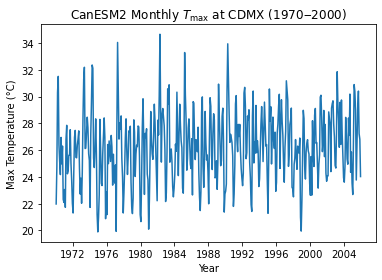

In [91]:
plt.plot(df.Date, df.MaxTemp)
plt.title(r'CanESM2 Monthly $T_\mathrm{max}$ at CDMX (1970‒2000)')
plt.xlabel("Year")
plt.ylabel("Max Temperature (°C)")

In [92]:
nc.close()

In [93]:
print(future)

['tasmax_Amon_CanESM2_rcp26_r1i1p1_200601-210012.nc', 'tasmax_Amon_CanESM2_rcp45_r1i1p1_200601-210012.nc', 'tasmax_Amon_CanESM2_rcp85_r1i1p1_200601-210012.nc']


In [94]:
for file in future:
    nc = Dataset(file)
    nc_time = nc.variables["time"]
    time_start = date2index(dt.datetime(2006, 1, 1), nc_time, select="nearest")
    time_end = date2index(dt.datetime(2100, 12, 31), nc_time, select="nearest")
    lat_cell1 = np.argmin(np.abs(nc_lat - target1['lat']))
    lon_cell1 = np.argmin(np.abs(nc_lon - target1['lon']))
    dat1 = nc.variables['tasmax'][time_start:(time_end + 1), lat_cell1, lon_cell1]
    dat1 = np.subtract(dat1.data, 273.15)
    dates = num2date(nc_time[time_start:time_end + 1], units=nc_time.units, calendar=nc_time.calendar)
    df2 = pd.DataFrame({'Date': dates, 'MaxTemp': dat1, 'Experiment': re.findall(r'rcp[24568]{2}', file)[0]})
    df2['Date'] = [dt.date(i.year, i.month, i.day) for i in df2.Date]
    df = df.append(df2, sort = True)
    nc.close()

<AxesSubplot:>

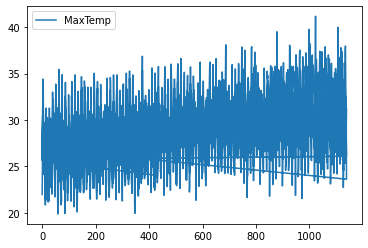

In [95]:
df.plot()

Text(0, 0.5, 'Max Temperature (°C)')

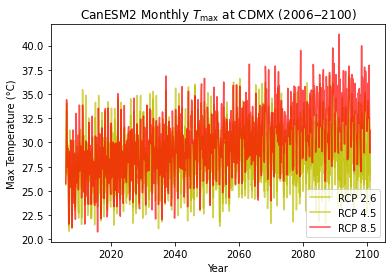

In [97]:
plt.plot(df.Date[df.Experiment == "rcp26"], df.MaxTemp[df.Experiment == "rcp26"], 'y-', alpha=0.7, label = 'RCP 2.6')
plt.plot(df.Date[df.Experiment == "rcp45"], df.MaxTemp[df.Experiment == "rcp45"], 'y-', alpha=0.7, label = 'RCP 4.5')
plt.plot(df.Date[df.Experiment == "rcp85"], df.MaxTemp[df.Experiment == "rcp85"], 'r-', alpha=0.7, label = 'RCP 8.5')
plt.legend(loc='lower right')
plt.title(r'CanESM2 Monthly $T_\mathrm{max}$ at CDMX (2006‒2100)')
plt.xlabel("Year")
plt.ylabel("Max Temperature (°C)")

Text(31.28864518633541, 0.5, 'Max Temperature (°C)')

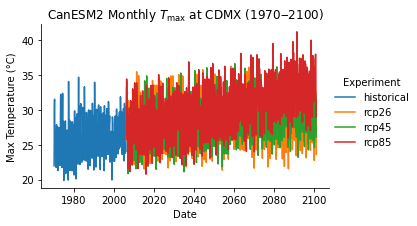

In [98]:
import seaborn as sns
fg = sns.FacetGrid(hue="Experiment", data=df, aspect=1.61)
fg.map(plt.plot, "Date", "MaxTemp").add_legend()
plt.title(r'CanESM2 Monthly $T_\mathrm{max}$ at CDMX (1970‒2100)')
plt.ylabel("Max Temperature (°C)")

In [99]:
df_wide = df.pivot(index='Date', columns='Experiment')['MaxTemp']
print(df_wide.head())

Experiment  historical  rcp26  rcp45  rcp85
Date                                       
1970-01-16   21.980499    NaN    NaN    NaN
1970-02-15   24.751343    NaN    NaN    NaN
1970-03-16   30.303101    NaN    NaN    NaN
1970-04-16   31.513000    NaN    NaN    NaN
1970-05-16   26.405151    NaN    NaN    NaN


In [100]:
print(df_wide.tail())

Experiment  historical      rcp26      rcp45      rcp85
Date                                                   
2100-08-16         NaN  32.613342  31.999420  37.958099
2100-09-16         NaN  30.131439  30.436462  33.899353
2100-10-16         NaN  26.828186  28.419769  31.863708
2100-11-16         NaN  29.043579  28.010284  28.935211
2100-12-16         NaN  23.630127  26.101990  31.250092


Text(0, 0.5, 'Max Temperature (°C)')

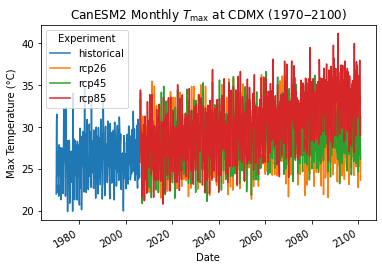

In [101]:
df_wide.plot(title = r'CanESM2 Monthly $T_\mathrm{max}$ at CDMX (1970‒2100)')
plt.ylabel("Max Temperature (°C)")

In [102]:
df_base = df[(df.Date >= dt.date(1970, 1, 1)) & (df.Date <= dt.date(1999, 12, 31))]
df_2020s = df[(df.Date >= dt.date(2000, 1, 1)) & (df.Date <= dt.date(2029, 12, 31))]
df_2050s = df[(df.Date >= dt.date(2030, 1, 1)) & (df.Date <= dt.date(2059, 12, 31))]
df_2080s = df[(df.Date >= dt.date(2060, 1, 1)) & (df.Date <= dt.date(2089, 12, 31))]

In [104]:
bsln26 = df_base[df_base.Experiment.isin(["historical", "rcp26"])].MaxTemp.mean()
bsln45 = df_base[df_base.Experiment.isin(["historical", "rcp45"])].MaxTemp.mean()
bsln85 = df_base[df_base.Experiment.isin(["historical", "rcp85"])].MaxTemp.mean()
bsln = np.mean([bsln26, bsln45, bsln85])

In [105]:
cf2020s_rcp26 = df_2020s[df_2020s.Experiment == "rcp26"].MaxTemp.mean() - bsln
cf2020s_rcp45 = df_2020s[df_2020s.Experiment == "rcp45"].MaxTemp.mean() - bsln
cf2020s_rcp85 = df_2020s[df_2020s.Experiment == "rcp85"].MaxTemp.mean() - bsln
cf2050s_rcp26 = df_2050s[df_2050s.Experiment == "rcp26"].MaxTemp.mean() - bsln
cf2050s_rcp45 = df_2050s[df_2050s.Experiment == "rcp45"].MaxTemp.mean() - bsln
cf2050s_rcp85 = df_2050s[df_2050s.Experiment == "rcp85"].MaxTemp.mean() - bsln
cf2080s_rcp26 = df_2080s[df_2080s.Experiment == "rcp26"].MaxTemp.mean() - bsln
cf2080s_rcp45 = df_2080s[df_2080s.Experiment == "rcp45"].MaxTemp.mean() - bsln
cf2080s_rcp85 = df_2080s[df_2080s.Experiment == "rcp85"].MaxTemp.mean() - bsln

In [106]:
print(pd.DataFrame({"Model": np.repeat("CanESM2", 3),
                    "Ensemble": np.repeat("r1i1p1", 3),
                    "Scenario": ["RCP2.6", "RCP4.5", "RCP8.5"],
                    "Baseline (°C)": np.repeat([bsln], 3),
                    "2020s": [cf2020s_rcp26, cf2020s_rcp45, cf2020s_rcp85],
                    "2050s": [cf2050s_rcp26, cf2050s_rcp45, cf2050s_rcp85],
                    "2080s": [cf2080s_rcp26, cf2080s_rcp45, cf2080s_rcp85]}))

     Model Ensemble Scenario  Baseline (°C)     2020s     2050s     2080s
0  CanESM2   r1i1p1   RCP2.6      26.090485  1.781780  2.675020  2.676996
1  CanESM2   r1i1p1   RCP4.5      26.090485  1.849489  2.882174  3.428282
2  CanESM2   r1i1p1   RCP8.5      26.090485  2.095697  4.232714  6.690559


<h1>Sec. 10 Lab exercise 4: Choosing our models</h1>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
file1 = "Colonia_Santa_Úrsula_Coapa_Coyoacán_CDMX_bsln-1971-2005_proj-2006-2100_Seasonal.csv"
file2 = "Colonia_Santa_Úrsula_Coapa_Coyoacán_CDMX_bsln-1971-2005_proj-2006-2100_Seasonal(1).csv"
file3 = "Tlahuac_CDMX_bsln-1971-2005_proj-2006-2100_Annual.csv"
file4 = "Playa_Caleta_Colonia_Marte_Iztacalco_CDMX_bsln-1971-2005_proj-2006-2100_Annual.csv"
file5 = "Calvario_Tlalpan_CDMX_bsln-1971-2005_proj-2006-2100_Annual.csv"

In [3]:
dat1 = pd.read_csv(file1)
dat2 = pd.read_csv(file2)
dat3 = pd.read_csv(file3)
dat4 = pd.read_csv(file4)
dat5 = pd.read_csv(file5)
print(dat1.head())
print(dat2.head())
print(dat3.head())
print(dat4.head())
print(dat5.head())

   Var       Model Scenario Ensemble Season  1971-2005  2006-2040  2041-2075
0  tas   ACCESS1.0   RCP4.5   r1i1p1    DJF  15.500982   1.022383   1.898229
1  tas   ACCESS1.0   RCP8.5   r1i1p1    DJF  15.500982   1.137783   2.994402
2  tas   ACCESS1.3   RCP4.5   r1i1p1    DJF  16.549155   1.062543   1.883080
3  tas   ACCESS1.3   RCP8.5   r1i1p1    DJF  16.549155   1.006100   2.899598
4  tas  bcc-csm1.1   RCP2.6   r1i1p1    DJF  18.948645   0.686171   0.814240
   Var       Model Scenario Ensemble Season  1971-2005  2006-2040  2041-2075
0  tas   ACCESS1.0   RCP4.5   r1i1p1    JJA  18.462911   1.072185   1.903294
1  tas   ACCESS1.0   RCP8.5   r1i1p1    JJA  18.462911   1.218646   2.863031
2  tas   ACCESS1.3   RCP4.5   r1i1p1    JJA  19.218164   1.094427   1.950333
3  tas   ACCESS1.3   RCP8.5   r1i1p1    JJA  19.218164   1.079425   2.967179
4  tas  bcc-csm1.1   RCP2.6   r1i1p1    JJA  23.482437   0.822089   1.339972
      Var       Model Scenario Ensemble  1971-2005  2006-2040  2041-2075
0  

In [4]:
print(dat1.shape)
print(dat2.shape)
print(dat3.shape)
print(dat4.shape)
print(dat5.shape)

(101, 8)
(101, 8)
(30, 7)
(30, 7)
(30, 7)


In [5]:
dat1 = dat1.drop(['Var', 'Ensemble'], axis = 1)
print(dat1.head())
dat2 = dat2.drop(['Var', 'Ensemble'], axis = 1)
print(dat2.head())
dat3 = dat3.drop(['Var', 'Ensemble'], axis = 1)
print(dat3.head())
dat4 = dat4.drop(['Var', 'Ensemble'], axis = 1)
print(dat4.head())
dat5 = dat5.drop(['Var', 'Ensemble'], axis = 1)
print(dat5.head())

        Model Scenario Season  1971-2005  2006-2040  2041-2075
0   ACCESS1.0   RCP4.5    DJF  15.500982   1.022383   1.898229
1   ACCESS1.0   RCP8.5    DJF  15.500982   1.137783   2.994402
2   ACCESS1.3   RCP4.5    DJF  16.549155   1.062543   1.883080
3   ACCESS1.3   RCP8.5    DJF  16.549155   1.006100   2.899598
4  bcc-csm1.1   RCP2.6    DJF  18.948645   0.686171   0.814240
        Model Scenario Season  1971-2005  2006-2040  2041-2075
0   ACCESS1.0   RCP4.5    JJA  18.462911   1.072185   1.903294
1   ACCESS1.0   RCP8.5    JJA  18.462911   1.218646   2.863031
2   ACCESS1.3   RCP4.5    JJA  19.218164   1.094427   1.950333
3   ACCESS1.3   RCP8.5    JJA  19.218164   1.079425   2.967179
4  bcc-csm1.1   RCP2.6    JJA  23.482437   0.822089   1.339972
        Model Scenario  1971-2005  2006-2040  2041-2075
0   ACCESS1.0   RCP4.5  22.712144   0.943447   2.083676
1   ACCESS1.0   RCP8.5  22.712144   1.278083   3.272530
2   ACCESS1.3   RCP4.5  24.097630   1.293291   2.103788
3   ACCESS1.3   RCP8

In [6]:
dat1_ext = dat1.copy()
dat2_ext = dat2.copy()
dat3_ext = dat3.copy()
dat4_ext = dat4.copy()
dat5_ext = dat5.copy()

In [7]:
dat1_ext['MeanAnom'] = dat1_ext.iloc[:,-3:].mean(axis = 1)
dat1_ext = dat1_ext.sort_values('MeanAnom')
print(dat1_ext.head()) # Smallest
dat2_ext['MeanAnom'] = dat2_ext.iloc[:,-3:].mean(axis = 1)
dat2_ext = dat2_ext.sort_values('MeanAnom')
print(dat2_ext.head()) # Smallest
dat3_ext['MeanAnom'] = dat3_ext.iloc[:,-3:].mean(axis = 1)
dat3_ext = dat3_ext.sort_values('MeanAnom')
print(dat3_ext.head()) # Smallest
dat4_ext['MeanAnom'] = dat4_ext.iloc[:,-3:].mean(axis = 1)
dat4_ext = dat4_ext.sort_values('MeanAnom')
print(dat4_ext.head()) # Smallest
dat5_ext['MeanAnom'] = dat5_ext.iloc[:,-3:].mean(axis = 1)
dat5_ext = dat5_ext.sort_values('MeanAnom')
print(dat5_ext.head()) # Smallest

        Model Scenario Season  1971-2005  2006-2040  2041-2075  MeanAnom
16      CCSM4   RCP2.6    DJF   8.042402   0.906261   1.142907  3.363857
91  MRI-CGCM3   RCP2.6    DJF   8.989691   0.403311   0.839388  3.410797
19  CESM1-BGC   RCP4.5    DJF   8.063268   0.635025   1.657660  3.451985
17      CCSM4   RCP4.5    DJF   8.042402   0.729524   1.690864  3.487597
92  MRI-CGCM3   RCP4.5    DJF   8.989691   0.528606   1.228684  3.582327
        Model Scenario Season  1971-2005  2006-2040  2041-2075  MeanAnom
91  MRI-CGCM3   RCP2.6    JJA  14.408553   0.579871   0.950115  5.312847
92  MRI-CGCM3   RCP4.5    JJA  14.408553   0.515370   1.393083  5.439002
35   EC-EARTH   RCP4.5    JJA  13.177381   1.183281   2.217581  5.526081
16      CCSM4   RCP2.6    JJA  14.828522   1.031242   1.158096  5.672620
93  MRI-CGCM3   RCP8.5    JJA  14.408553   0.718470   2.060421  5.729148
         Model Scenario  1971-2005  2006-2040  2041-2075  MeanAnom
16       CCSM4   RCP2.6  17.824177   0.998515   1.237421 

In [8]:
print(dat1_ext.tail()) # Largest
print(dat2_ext.tail()) # Largest
print(dat3_ext.tail()) # Largest
print(dat4_ext.tail()) # Largest
print(dat5_ext.tail()) # Largest

             Model Scenario Season  1971-2005  2006-2040  2041-2075  MeanAnom
79  MIROC-ESM-CHEM   RCP2.6    DJF  21.985482   1.295191   2.229033  8.503235
77       MIROC-ESM   RCP4.5    DJF  22.012596   1.195677   2.416770  8.541681
80  MIROC-ESM-CHEM   RCP4.5    DJF  21.985482   1.183518   2.569943  8.579648
78       MIROC-ESM   RCP8.5    DJF  22.012596   1.612860   2.490099  8.705185
81  MIROC-ESM-CHEM   RCP8.5    DJF  21.985482   1.664477   2.971622  8.873861
             Model Scenario Season  1971-2005  2006-2040  2041-2075   MeanAnom
79  MIROC-ESM-CHEM   RCP2.6    JJA  28.642576   1.665097   2.415890  10.907854
77       MIROC-ESM   RCP4.5    JJA  28.844758   1.367765   2.696899  10.969807
80  MIROC-ESM-CHEM   RCP4.5    JJA  28.642576   1.593549   3.106612  11.114246
78       MIROC-ESM   RCP8.5    JJA  28.844758   1.519754   3.007136  11.123883
81  MIROC-ESM-CHEM   RCP8.5    JJA  28.642576   1.840072   4.025390  11.502679
        Model Scenario  1971-2005  2006-2040  2041-2075   

In [9]:
lower = dat1_ext.groupby('Scenario').first().assign(Limit = "Lower").reset_index()
upper = dat1_ext.groupby("Scenario").last().assign(Limit = "Upper").reset_index()
dat1_ext = lower.append(upper).drop("MeanAnom", axis = 1)
print(dat1_ext)
lower = dat2_ext.groupby('Scenario').first().assign(Limit = "Lower").reset_index()
upper = dat2_ext.groupby("Scenario").last().assign(Limit = "Upper").reset_index()
dat2_ext = lower.append(upper).drop("MeanAnom", axis = 1)
print(dat2_ext)
lower = dat3_ext.groupby('Scenario').first().assign(Limit = "Lower").reset_index()
upper = dat3_ext.groupby("Scenario").last().assign(Limit = "Upper").reset_index()
dat3_ext = lower.append(upper).drop("MeanAnom", axis = 1)
print(dat3_ext)
lower = dat4_ext.groupby('Scenario').first().assign(Limit = "Lower").reset_index()
upper = dat4_ext.groupby("Scenario").last().assign(Limit = "Upper").reset_index()
dat4_ext = lower.append(upper).drop("MeanAnom", axis = 1)
print(dat4_ext)
lower = dat5_ext.groupby('Scenario').first().assign(Limit = "Lower").reset_index()
upper = dat5_ext.groupby("Scenario").last().assign(Limit = "Upper").reset_index()
dat5_ext = lower.append(upper).drop("MeanAnom", axis = 1)
print(dat5_ext)

  Scenario           Model Season  1971-2005  2006-2040  2041-2075  Limit
0   RCP2.6           CCSM4    DJF   8.042402   0.906261   1.142907  Lower
1   RCP4.5       CESM1-BGC    DJF   8.063268   0.635025   1.657660  Lower
2   RCP8.5       CESM1-BGC    DJF   8.063268   0.838442   2.107967  Lower
0   RCP2.6  MIROC-ESM-CHEM    DJF  21.985482   1.295191   2.229033  Upper
1   RCP4.5  MIROC-ESM-CHEM    DJF  21.985482   1.183518   2.569943  Upper
2   RCP8.5  MIROC-ESM-CHEM    DJF  21.985482   1.664477   2.971622  Upper
  Scenario           Model Season  1971-2005  2006-2040  2041-2075  Limit
0   RCP2.6       MRI-CGCM3    JJA  14.408553   0.579871   0.950115  Lower
1   RCP4.5       MRI-CGCM3    JJA  14.408553   0.515370   1.393083  Lower
2   RCP8.5       MRI-CGCM3    JJA  14.408553   0.718470   2.060421  Lower
0   RCP2.6  MIROC-ESM-CHEM    JJA  28.642576   1.665097   2.415890  Upper
1   RCP4.5  MIROC-ESM-CHEM    JJA  28.642576   1.593549   3.106612  Upper
2   RCP8.5  MIROC-ESM-CHEM    JJA  28.

In [11]:
csuc = pd.read_csv("9014-COLONIA SANTA URSULA COAPA-DF-Tprom.csv")#, index_col = 2)
print(csuc.head())

   Mes  Día  Anio      Date  MeanTemp
0    1    1  1971  1971-1-1      13.0
1    1    2  1971  1971-1-2      13.5
2    1    3  1971  1971-1-3      14.0
3    1    4  1971  1971-1-4      12.5
4    1    5  1971  1971-1-5      13.0


In [12]:
csuc.Date = pd.to_datetime(csuc.Date)

In [13]:
csuc_mean = csuc[['Date', 'MeanTemp']].groupby(csuc.Date.dt.month).mean()
print(csuc_mean)

       MeanTemp
Date           
1     13.846315
2     15.422157
3     17.977176
4     19.520527
5     19.706855
6     19.168857
7     18.180182
8     18.344592
9     17.923300
10    16.908072
11    15.470192
12    14.141118


In [14]:
csuc_tas_mean_winter = np.mean(np.array([13.846315,15.422157,14.141118]))
csuc_tas_std_winter = np.std(np.array([13.846315,15.422157,14.141118]))
csuc_tas_mean_summer = np.mean(np.array([19.168857,18.180182,18.344592]))
csuc_tas_std_summer = np.std(np.array([19.168857,18.180182,18.344592]))
print("Mean winter:", csuc_tas_mean_winter, "... Standard Deviation winter:", csuc_tas_std_winter)
print("Mean summer:", csuc_tas_mean_summer, "... Standard Deviation summer:", csuc_tas_std_summer)

Mean winter: 14.469863333333334 ... Standard Deviation winter: 0.6840441617723879
Mean summer: 18.564543666666665 ... Standard Deviation summer: 0.43255336137740175


In [15]:
dat1_gf = dat1.copy()[['Model', '1971-2005']].drop_duplicates()
dat2_gf = dat2.copy()[['Model', '1971-2005']].drop_duplicates()

In [16]:
dat1_gf = dat1_gf.assign(GFCI = abs(dat1_gf[['1971-2005']] - csuc_tas_mean_winter) / csuc_tas_std_winter)
dat2_gf = dat2_gf.assign(GFCI = abs(dat2_gf[['1971-2005']] - csuc_tas_mean_summer) / csuc_tas_std_summer)
print(dat1_gf.sort_values('GFCI').head())
print(dat2_gf.sort_values('GFCI').head())

           Model  1971-2005      GFCI
74  IPSL-CM5B-LR  14.971983  0.734046
68  IPSL-CM5A-LR  13.875267  0.869237
71  IPSL-CM5A-MR  13.633481  1.222703
63    HadGEM2-AO  15.362102  1.304359
0      ACCESS1.0  15.500982  1.507387
           Model  1971-2005      GFCI
0      ACCESS1.0  18.462911  0.234961
63    HadGEM2-AO  18.391000  0.401208
71  IPSL-CM5A-MR  18.848062  0.655452
88    MPI-ESM-MR  18.237764  0.755466
85    MPI-ESM-LR  18.149018  0.960635


In [17]:
def confidence(GFCI):
    if (GFCI < 0.5):
        return "high"
    elif (GFCI > 1.0):
        return "low"
    else:
        return "moderate"

In [18]:
dat1_gf['Confidence'] = dat1_gf.GFCI.apply(confidence)
dat2_gf['Confidence'] = dat2_gf.GFCI.apply(confidence)
print(dat1_gf.sort_values('GFCI').head(20))
print(dat2_gf.sort_values('GFCI').head(20))

            Model  1971-2005      GFCI Confidence
74   IPSL-CM5B-LR  14.971983  0.734046   moderate
68   IPSL-CM5A-LR  13.875267  0.869237   moderate
71   IPSL-CM5A-MR  13.633481  1.222703        low
63     HadGEM2-AO  15.362102  1.304359        low
0       ACCESS1.0  15.500982  1.507387        low
82         MIROC5  15.837440  1.999252        low
13        CanESM2  16.014729  2.258430        low
50     GFDL-ESM2M  12.857175  2.357579        low
47     GFDL-ESM2G  12.759887  2.499804        low
27       CMCC-CMS  12.620539  2.703517        low
2       ACCESS1.3  16.549155  3.039703        low
66         inmcm4  12.329191  3.129436        low
56   GISS-E2-H-CC  12.179883  3.347708        low
29       CNRM-CM5  12.070475  3.507652        low
88     MPI-ESM-MR  12.061698  3.520483        low
32  CSIRO-Mk3.6.0  11.985141  3.632401        low
25        CMCC-CM  11.922083  3.724585        low
85     MPI-ESM-LR  11.887634  3.774945        low
61   GISS-E2-R-CC  11.881328  3.784163        low


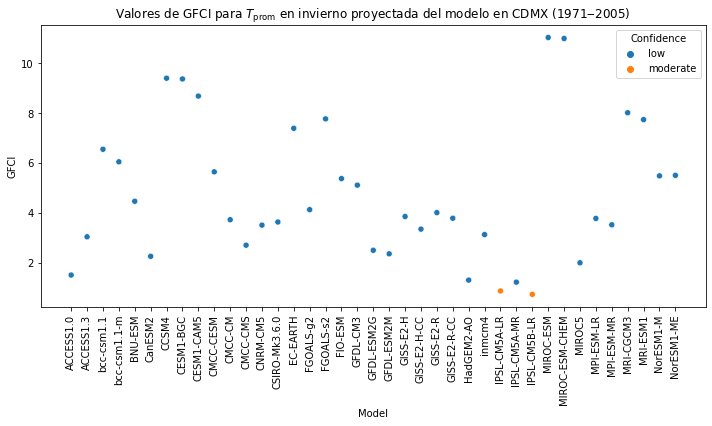

In [20]:
plt.figure(figsize=(10,10/1.66))
fg = sns.scatterplot(x="Model", y="GFCI", hue="Confidence", data=dat1_gf)
plt.title(r'Valores de GFCI para $T_\mathrm{prom}$ en invierno proyectada del modelo en CDMX (1971‒2005)')
for label in fg.axes.get_xticklabels():
    label.set_rotation(90)
plt.tight_layout()
plt.savefig('gfcii_csuc.png')

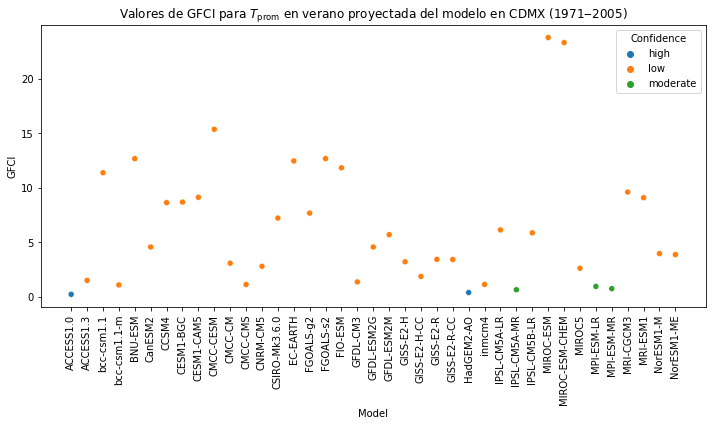

In [21]:
plt.figure(figsize=(10,10/1.66))
fg = sns.scatterplot(x="Model", y="GFCI", hue="Confidence", data=dat2_gf)
plt.title(r'Valores de GFCI para $T_\mathrm{prom}$ en verano proyectada del modelo en CDMX (1971‒2005)')
for label in fg.axes.get_xticklabels():
    label.set_rotation(90)
plt.tight_layout()
plt.savefig('gfciv_csuc.png')

In [22]:
dat1_gf = dat1_gf.sort_values('GFCI').iloc[0:4,:]
print(dat1_gf)
dat2_gf = dat2_gf.sort_values('GFCI').iloc[0:4,:]
print(dat2_gf)

           Model  1971-2005      GFCI Confidence
74  IPSL-CM5B-LR  14.971983  0.734046   moderate
68  IPSL-CM5A-LR  13.875267  0.869237   moderate
71  IPSL-CM5A-MR  13.633481  1.222703        low
63    HadGEM2-AO  15.362102  1.304359        low
           Model  1971-2005      GFCI Confidence
0      ACCESS1.0  18.462911  0.234961       high
63    HadGEM2-AO  18.391000  0.401208       high
71  IPSL-CM5A-MR  18.848062  0.655452   moderate
88    MPI-ESM-MR  18.237764  0.755466   moderate


In [23]:
dat1_gf = pd.merge(dat1_gf, dat1, how = 'left', on = ['Model', '1971-2005'])
print(dat1_gf)
dat2_gf = pd.merge(dat2_gf, dat2, how = 'left', on = ['Model', '1971-2005'])
print(dat2_gf)

           Model  1971-2005      GFCI Confidence Scenario Season  2006-2040  \
0   IPSL-CM5B-LR  14.971983  0.734046   moderate   RCP4.5    DJF   0.644709   
1   IPSL-CM5B-LR  14.971983  0.734046   moderate   RCP8.5    DJF   0.781313   
2   IPSL-CM5A-LR  13.875267  0.869237   moderate   RCP2.6    DJF   0.636414   
3   IPSL-CM5A-LR  13.875267  0.869237   moderate   RCP4.5    DJF   0.531692   
4   IPSL-CM5A-LR  13.875267  0.869237   moderate   RCP8.5    DJF   0.765920   
5   IPSL-CM5A-MR  13.633481  1.222703        low   RCP2.6    DJF   1.009643   
6   IPSL-CM5A-MR  13.633481  1.222703        low   RCP4.5    DJF   1.195877   
7   IPSL-CM5A-MR  13.633481  1.222703        low   RCP8.5    DJF   0.946037   
8     HadGEM2-AO  15.362102  1.304359        low   RCP2.6    DJF   0.799795   
9     HadGEM2-AO  15.362102  1.304359        low   RCP4.5    DJF   1.114813   
10    HadGEM2-AO  15.362102  1.304359        low   RCP8.5    DJF   0.851755   

    2041-2075  
0    0.817968  
1    1.727769  
2  

In [24]:
dat1_ens = dat1.copy().groupby(['Scenario']).mean().reset_index()
print(dat1_ens)
dat2_ens = dat2.copy().groupby(['Scenario']).mean().reset_index()
print(dat2_ens)

  Scenario  1971-2005  2006-2040  2041-2075
0   RCP2.6  13.696723   0.861049   1.244948
1   RCP4.5  13.376380   0.885198   1.640658
2   RCP8.5  13.559995   0.945144   2.419423
  Scenario  1971-2005  2006-2040  2041-2075
0   RCP2.6  19.776011   0.986979   1.462271
1   RCP4.5  19.143145   1.014322   1.951865
2   RCP8.5  19.308768   1.117864   2.879821


In [25]:
print(dat1.groupby(['Scenario']).count().reset_index())
print(dat2.groupby(['Scenario']).count().reset_index())

  Scenario  Model  Season  1971-2005  2006-2040  2041-2075
0   RCP2.6     26      26         26         26         26
1   RCP4.5     36      36         36         36         36
2   RCP8.5     39      39         39         39         39
  Scenario  Model  Season  1971-2005  2006-2040  2041-2075
0   RCP2.6     26      26         26         26         26
1   RCP4.5     36      36         36         36         36
2   RCP8.5     39      39         39         39         39


In [26]:
dat1_ext = dat1_ext[dat1_ext.Scenario.isin(['RCP4.5', 'RCP8.5'])]
print(dat1_ext)
dat2_ext = dat2_ext[dat2_ext.Scenario.isin(['RCP4.5', 'RCP8.5'])]
print(dat2_ext)

  Scenario           Model Season  1971-2005  2006-2040  2041-2075  Limit
1   RCP4.5       CESM1-BGC    DJF   8.063268   0.635025   1.657660  Lower
2   RCP8.5       CESM1-BGC    DJF   8.063268   0.838442   2.107967  Lower
1   RCP4.5  MIROC-ESM-CHEM    DJF  21.985482   1.183518   2.569943  Upper
2   RCP8.5  MIROC-ESM-CHEM    DJF  21.985482   1.664477   2.971622  Upper
  Scenario           Model Season  1971-2005  2006-2040  2041-2075  Limit
1   RCP4.5       MRI-CGCM3    JJA  14.408553   0.515370   1.393083  Lower
2   RCP8.5       MRI-CGCM3    JJA  14.408553   0.718470   2.060421  Lower
1   RCP4.5  MIROC-ESM-CHEM    JJA  28.642576   1.593549   3.106612  Upper
2   RCP8.5  MIROC-ESM-CHEM    JJA  28.642576   1.840072   4.025390  Upper


In [29]:
anom1 = dat1_ext.loc[dat1_ext.Model == 'MIROC-ESM-CHEM', '2006-2040'].values
print(anom1[0],anom1[1])
anom2 = dat2_ext.loc[dat2_ext.Model == 'MIROC-ESM-CHEM', '2006-2040'].values
print(anom2[0],anom2[1])

1.183518481855632 1.6644770090653438
1.5935494559151806 1.8400716145833336


In [30]:
csuc_ext1 = csuc.copy()[['Date', 'MeanTemp']]
csuc_ext2 = csuc.copy()[['Date', 'MeanTemp']]
csuc_ext_win_45 = csuc_ext1.assign(hex2020s = csuc.MeanTemp + anom1[0])
csuc_ext_sum_45 = csuc_ext1.assign(hex2020s = csuc.MeanTemp + anom2[0])
csuc_ext_win_85 = csuc_ext2.assign(hex2020s = csuc.MeanTemp + anom1[1])
csuc_ext_sum_85 = csuc_ext2.assign(hex2020s = csuc.MeanTemp + anom2[1])
print(csuc_ext_win_45.head())
print(csuc_ext_sum_45.head())
print(csuc_ext_win_85.head())
print(csuc_ext_sum_85.head())

        Date  MeanTemp   hex2020s
0 1971-01-01      13.0  14.183518
1 1971-01-02      13.5  14.683518
2 1971-01-03      14.0  15.183518
3 1971-01-04      12.5  13.683518
4 1971-01-05      13.0  14.183518
        Date  MeanTemp   hex2020s
0 1971-01-01      13.0  14.593549
1 1971-01-02      13.5  15.093549
2 1971-01-03      14.0  15.593549
3 1971-01-04      12.5  14.093549
4 1971-01-05      13.0  14.593549
        Date  MeanTemp   hex2020s
0 1971-01-01      13.0  14.664477
1 1971-01-02      13.5  15.164477
2 1971-01-03      14.0  15.664477
3 1971-01-04      12.5  14.164477
4 1971-01-05      13.0  14.664477
        Date  MeanTemp   hex2020s
0 1971-01-01      13.0  14.840072
1 1971-01-02      13.5  15.340072
2 1971-01-03      14.0  15.840072
3 1971-01-04      12.5  14.340072
4 1971-01-05      13.0  14.840072


In [31]:
csuc_ext_win_45['HDDObs'] = csuc_ext_win_45.MeanTemp.apply(lambda x: 0 if x >= 18 else 18 - x)
csuc_ext_win_45['HDDhex2020s'] = csuc_ext_win_45.hex2020s.apply(lambda x: 0 if x >= 18 else 18 - x)
print(csuc_ext_win_45.head())
csuc_ext_sum_45['CDDObs'] = csuc_ext_sum_45.MeanTemp.apply(lambda x: 0 if x <= 18 else x - 18)
csuc_ext_sum_45['CDDhex2020s'] = csuc_ext_sum_45.hex2020s.apply(lambda x: 0 if x <= 18 else x - 18)
print(csuc_ext_sum_45.head())
csuc_ext_win_85['HDDObs'] = csuc_ext_win_85.MeanTemp.apply(lambda x: 0 if x >= 18 else 18 - x)
csuc_ext_win_85['HDDhex2020s'] = csuc_ext_win_85.hex2020s.apply(lambda x: 0 if x >= 18 else 18 - x)
print(csuc_ext_win_85.head())
csuc_ext_sum_85['CDDObs'] = csuc_ext_sum_85.MeanTemp.apply(lambda x: 0 if x <= 18 else x - 18)
csuc_ext_sum_85['CDDhex2020s'] = csuc_ext_sum_85.hex2020s.apply(lambda x: 0 if x <= 18 else x - 18)
print(csuc_ext_sum_85.head())

        Date  MeanTemp   hex2020s  HDDObs  HDDhex2020s
0 1971-01-01      13.0  14.183518     5.0     3.816482
1 1971-01-02      13.5  14.683518     4.5     3.316482
2 1971-01-03      14.0  15.183518     4.0     2.816482
3 1971-01-04      12.5  13.683518     5.5     4.316482
4 1971-01-05      13.0  14.183518     5.0     3.816482
        Date  MeanTemp   hex2020s  CDDObs  CDDhex2020s
0 1971-01-01      13.0  14.593549     0.0          0.0
1 1971-01-02      13.5  15.093549     0.0          0.0
2 1971-01-03      14.0  15.593549     0.0          0.0
3 1971-01-04      12.5  14.093549     0.0          0.0
4 1971-01-05      13.0  14.593549     0.0          0.0
        Date  MeanTemp   hex2020s  HDDObs  HDDhex2020s
0 1971-01-01      13.0  14.664477     5.0     3.335523
1 1971-01-02      13.5  15.164477     4.5     2.835523
2 1971-01-03      14.0  15.664477     4.0     2.335523
3 1971-01-04      12.5  14.164477     5.5     3.835523
4 1971-01-05      13.0  14.664477     5.0     3.335523
        Da

In [32]:
from math import isnan

def recalc_exp(obs, anoms, stat, expr, month = None):
    """Recalculate and aggregate an exposure unit using observed data
    and Conjuntool output.

    Parameters
    ----------
    obs   : pandas.core.series.Series
        A single-column or array data frame with 'Date' and some variable column
    anoms : pandas.core.frame.DataFrame
        The data frame produced by Conjuntool, filtered as necessary
    stat  : builtin_function_or_method or function
        The function to call on the calculated exposure unit, e.g. sum
    expr  : str
        A lambda expression to be applied to the variable column to
        calculate the exposure unit
    month : list
        A list of the months to filter on (optional)
    """
    row_list = []
    if month is not None:
        obs = obs[obs.Date.dt.month.isin(month)]
    baseline = stat(obs.iloc[:,1].apply(eval(expr)))
    for model in set(anoms.Model):
        for scen in set(anoms.Scenario):
            periods = {}
            for period in [col for col in anoms.columns if '-' in col][1:]:
                anom = anoms.loc[(anoms.Scenario == scen) & (anoms.Model == model)][[period]].values
                if len(anom) == 0:
                    continue
                else:
                    anom = anom[0]
                tmp = obs.assign(new = obs.iloc[:,1].values + anom)
                tmp = stat(tmp.new.apply(eval(expr)))
                periods[period] = tmp
            if all(isnan(value) for value in periods.values()):
                continue
            else:
                row = {'Model': model,
                       'Scenario': scen,
                       'Baseline': baseline}
                row = {**row, **periods}
                row_list.append(row)
    return pd.DataFrame(row_list, columns=row.keys())

In [34]:
print(csuc_ext_sum_45[csuc_ext_sum_45.Date.dt.month.isin([6,7,8])].filter(regex = '^CDD').sum())
print(csuc_ext_sum_85[csuc_ext_sum_85.Date.dt.month.isin([6,7,8])].filter(regex = '^CDD').sum())
print(pd.merge(recalc_exp(obs=csuc[['Date', 'MeanTemp']],
                 anoms=dat2_ext,
                 stat=sum,
                 expr="lambda x: 0 if x <= 18 else x - 18",
                 month=[6,7,8]),
               dat2_ext[['Scenario', 'Model', 'Limit']]))

CDDObs         3948.911502
CDDhex2020s    9187.250200
dtype: float64
CDDObs          3948.911502
CDDhex2020s    10130.951129
dtype: float64
            Model Scenario     Baseline     2006-2040     2041-2075  Limit
0  MIROC-ESM-CHEM   RCP8.5  3948.911502  10130.951129  18977.279264  Upper
1  MIROC-ESM-CHEM   RCP4.5  3948.911502   9187.250200  15196.554798  Upper
2       MRI-CGCM3   RCP8.5  3948.911502   6075.049243  10985.844688  Lower
3       MRI-CGCM3   RCP4.5  3948.911502   5419.847691   8438.626827  Lower


In [35]:
csuc_win_45 = csuc_ext_win_45.copy()
csuc_win_85 = csuc_ext_win_85.copy()
csuc_win_45['Date'] = csuc_win_45.Date.apply(lambda x: x + pd.DateOffset(years=1) if x.month == 12 else x)
csuc_win_85['Date'] = csuc_win_85.Date.apply(lambda x: x + pd.DateOffset(years=1) if x.month == 12 else x)
#print(csuc_win.head()) # Not shifted
#print(csuc_win.tail())

csuc_win_45 = csuc_win_45[csuc_win_45.Date.dt.year.isin(range(1972, 2006))]
csuc_win_85 = csuc_win_85[csuc_win_85.Date.dt.year.isin(range(1972, 2006))]
print(csuc_ext_win_45[csuc_ext_win_45.Date.dt.month.isin([12,1,2])].filter(regex = '^HDD').sum())
print(csuc_ext_win_85[csuc_ext_win_85.Date.dt.month.isin([12,1,2])].filter(regex = '^HDD').sum())
print(pd.merge(recalc_exp(obs=csuc[['Date', 'MeanTemp']],
                          anoms=dat1_ext,
                          stat=sum,
                          expr="lambda x: 0 if x >= 18 else 18 - x",
                          month=[12,1,2]),
               dat1_ext[['Scenario', 'Model', 'Limit']]))

HDDObs         14634.871543
HDDhex2020s    10261.177576
dtype: float64
HDDObs         14634.871543
HDDhex2020s     8635.174204
dtype: float64
            Model Scenario      Baseline     2006-2040    2041-2075  Limit
0  MIROC-ESM-CHEM   RCP8.5  14634.871543   8635.174204  4866.545888  Upper
1  MIROC-ESM-CHEM   RCP4.5  14634.871543  10261.177576  5911.685029  Upper
2       CESM1-BGC   RCP8.5  14634.871543  11487.963307  7239.634919  Lower
3       CESM1-BGC   RCP4.5  14634.871543  12231.919704  8657.423312  Lower


In [41]:
from numpy import mean

print(pd.merge(recalc_exp(obs=csuc[['Date', 'MeanTemp']],
                          anoms=dat2_ext,
                          stat=mean,
                          expr="lambda x: 0 if x <= 18 else x - 18",
                          month=[6,7,8]),
               dat2_ext[['Scenario', 'Model', 'Limit']]))
print(pd.merge(recalc_exp(obs=csuc[['Date', 'MeanTemp']],
                          anoms=dat1_ext,
                          stat=mean,
                          expr="lambda x: 0 if x >= 18 else 18 - x",
                          month=[12,1,2]),
               dat1_ext[['Scenario', 'Model', 'Limit']]))

            Model Scenario  Baseline  2006-2040  2041-2075  Limit
0  MIROC-ESM-CHEM   RCP8.5  0.953843   2.447090   4.583884  Upper
1  MIROC-ESM-CHEM   RCP4.5  0.953843   2.219143   3.670665  Upper
2       MRI-CGCM3   RCP8.5  0.953843   1.467403   2.653586  Lower
3       MRI-CGCM3   RCP4.5  0.953843   1.309142   2.038316  Lower
            Model Scenario  Baseline  2006-2040  2041-2075  Limit
0  MIROC-ESM-CHEM   RCP8.5  3.603761   2.126366   1.198361  Upper
1  MIROC-ESM-CHEM   RCP4.5  3.603761   2.526761   1.455722  Upper
2       CESM1-BGC   RCP8.5  3.603761   2.828851   1.782722  Lower
3       CESM1-BGC   RCP4.5  3.603761   3.012046   2.131845  Lower


In [42]:
dat1_ens['Model'] = "Ensemble"
print(dat1_ens)
dat2_ens['Model'] = "Ensemble"
print(dat2_ens)

  Scenario  1971-2005  2006-2040  2041-2075     Model
0   RCP2.6  13.696723   0.861049   1.244948  Ensemble
1   RCP4.5  13.376380   0.885198   1.640658  Ensemble
2   RCP8.5  13.559995   0.945144   2.419423  Ensemble
  Scenario  1971-2005  2006-2040  2041-2075     Model
0   RCP2.6  19.776011   0.986979   1.462271  Ensemble
1   RCP4.5  19.143145   1.014322   1.951865  Ensemble
2   RCP8.5  19.308768   1.117864   2.879821  Ensemble


In [51]:
print(recalc_exp(obs=csuc[['Date', 'MeanTemp']],
                 anoms=dat2_ens[dat2_ens.Scenario.isin(['RCP4.5', 'RCP8.5'])],
                 stat=sum,
                 expr="lambda x: 0 if x <= 18 else x - 18",
                 month=[6,7,8]))

      Model Scenario     Baseline    2006-2040     2041-2075
0  Ensemble   RCP8.5  3948.911502  7440.278824  14271.837753
1  Ensemble   RCP4.5  3948.911502  7068.667696  10561.244809


In [52]:
print(recalc_exp(obs=csuc[['Date', 'MeanTemp']],
                 anoms=dat1_ens[dat1_ens.Scenario.isin(['RCP4.5', 'RCP8.5'])],
                 stat=sum,
                 expr="lambda x: 0 if x >= 18 else 18 - x",
                 month=[12,1,2]))

      Model Scenario      Baseline     2006-2040    2041-2075
0  Ensemble   RCP8.5  14634.871543  11101.703819  6328.965823
1  Ensemble   RCP4.5  14634.871543  11318.707801  8712.918522


In [53]:
print(recalc_exp(obs=csuc[['Date', 'MeanTemp']],
                 anoms=dat2_gf[dat2_gf.Scenario.isin(['RCP8.5', 'RCP4.5'])],
                 stat=sum,
                 expr="lambda x: 0 if x <= 18 else x - 18",
                 month=[6,7,8]))
print(recalc_exp(obs=csuc[['Date', 'MeanTemp']],
                 anoms=dat1_gf[dat1_gf.Scenario.isin(['RCP8.5', 'RCP4.5'])],
                 stat=sum,
                 expr="lambda x: 0 if x >= 18 else 18 - x",
                 month=[12,1,2]))

          Model Scenario     Baseline    2006-2040     2041-2075
0    HadGEM2-AO   RCP8.5  3948.911502  6632.021263  13028.473103
1    HadGEM2-AO   RCP4.5  3948.911502  7756.417378  11931.186714
2  IPSL-CM5A-MR   RCP8.5  3948.911502  9043.211905  19556.312533
3  IPSL-CM5A-MR   RCP4.5  3948.911502  8889.209492  13726.998756
4     ACCESS1.0   RCP8.5  3948.911502  7801.986070  14203.671886
5     ACCESS1.0   RCP4.5  3948.911502  7276.338141  10374.295804
6    MPI-ESM-MR   RCP8.5  3948.911502  7619.653930  15147.243953
7    MPI-ESM-MR   RCP4.5  3948.911502  7359.481055  10630.126148
          Model Scenario      Baseline     2006-2040     2041-2075
0  IPSL-CM5B-LR   RCP8.5  14634.871543  11694.769576   8428.588323
1  IPSL-CM5B-LR   RCP4.5  14634.871543  12196.225405  11562.080934
2  IPSL-CM5A-MR   RCP8.5  14634.871543  11098.469917   4454.899161
3  IPSL-CM5A-MR   RCP4.5  14634.871543  10217.946917   7596.260950
4    HadGEM2-AO   RCP8.5  14634.871543  11439.771243   5989.059445
5    HadGEM2-

In [55]:
out1 = recalc_exp(obs=csuc[['Date', 'MeanTemp']],
                 anoms=dat1_gf[dat1_gf.Scenario.isin(['RCP4.5', 'RCP8.5'])],
                 stat=sum,
                 expr="lambda x: 0 if x >= 18 else 18 - x",
                 month=[12,1,2])
print(out1)
out2 = recalc_exp(obs=csuc[['Date', 'MeanTemp']],
                 anoms=dat2_gf[dat1_gf.Scenario.isin(['RCP4.5', 'RCP8.5'])],
                 stat=sum,
                 expr="lambda x: 0 if x <= 18 else x - 18",
                 month=[6,7,8])
print(out2)

          Model Scenario      Baseline     2006-2040     2041-2075
0  IPSL-CM5B-LR   RCP8.5  14634.871543  11694.769576   8428.588323
1  IPSL-CM5B-LR   RCP4.5  14634.871543  12196.225405  11562.080934
2  IPSL-CM5A-MR   RCP8.5  14634.871543  11098.469917   4454.899161
3  IPSL-CM5A-MR   RCP4.5  14634.871543  10217.946917   7596.260950
4    HadGEM2-AO   RCP8.5  14634.871543  11439.771243   5989.059445
5    HadGEM2-AO   RCP4.5  14634.871543  10501.508209   6941.295284
6  IPSL-CM5A-LR   RCP8.5  14634.871543  11750.494457   7789.737369
7  IPSL-CM5A-LR   RCP4.5  14634.871543  12612.806994  10005.174920
          Model Scenario     Baseline    2006-2040     2041-2075
0    HadGEM2-AO   RCP8.5  3948.911502  6632.021263  13028.473103
1    HadGEM2-AO   RCP4.5  3948.911502  7756.417378  11931.186714
2  IPSL-CM5A-MR   RCP8.5  3948.911502  9043.211905  19556.312533
3  IPSL-CM5A-MR   RCP4.5  3948.911502  8889.209492  13726.998756
4     ACCESS1.0   RCP8.5  3948.911502  7801.986070  14203.671886
5     A

In [56]:
out1_long = out1.melt(id_vars = ['Model', 'Scenario'], var_name = "Period", value_name = "Heating Degree Days")
out2_long = out2.melt(id_vars = ['Model', 'Scenario'], var_name = "Period", value_name = "Cooling Degree Days")

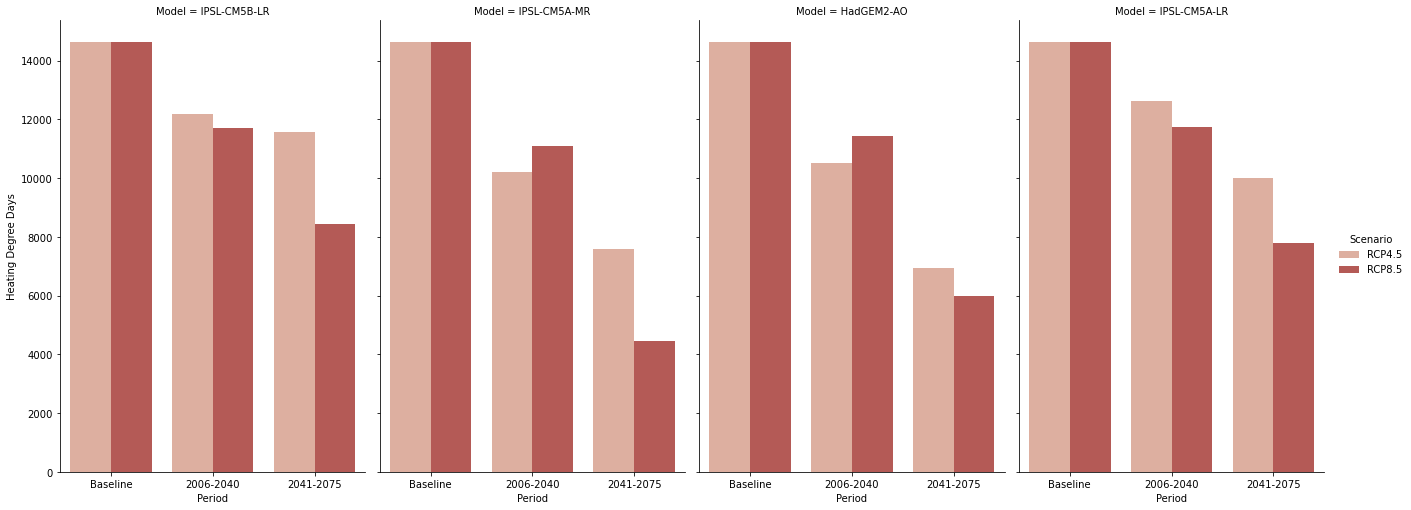

In [57]:
sns.catplot(x = "Period", y = "Heating Degree Days", hue = "Scenario", col = "Model",
            data = out1_long, hue_order=["RCP4.5", "RCP8.5"], saturation = 0.5,
            palette = "Reds", kind = "bar", ci = None, height = 7, aspect = 0.66)
plt.savefig('seabi_csuc.png')

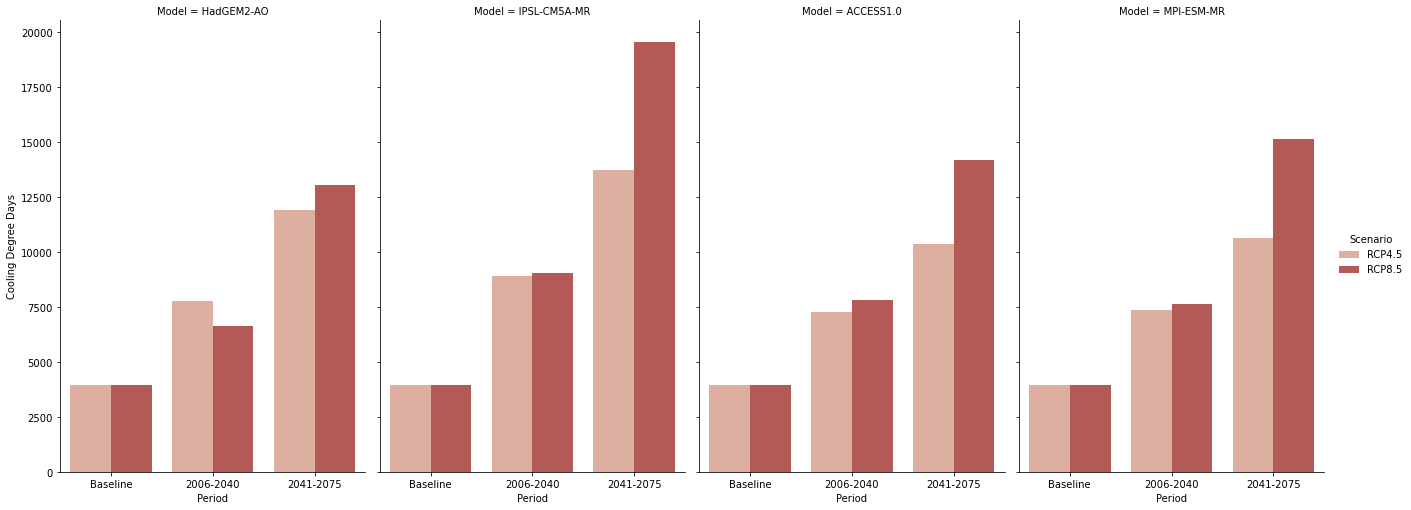

In [58]:
sns.catplot(x = "Period", y = "Cooling Degree Days", hue = "Scenario", col = "Model",
            data = out2_long, hue_order=["RCP4.5", "RCP8.5"], saturation = 0.5,
            palette = "Reds", kind = "bar", ci = None, height = 7, aspect = 0.66)
plt.savefig('seabv_csuc.png')

<h1>Sec. 11 Downscaled climate data from PCIC</h1>

In [1]:
import datetime as dt
import json
import numpy as np
import os
import re
import requests
from netCDF4 import Dataset, date2index, num2date, date2num
from tqdm import tqdm

In [2]:
# Adapted from: https://stackoverflow.com/a/37573701
def download(url, filename):
    print("Downloading ", filename)
    r = requests.get(url, stream=True)
    total_size, block_size = int(r.headers.get('content-length', 0)), 1024
    with open(filename, 'wb') as f:
        for data in tqdm(r.iter_content(block_size),
                         total=total_size//block_size,
                         unit='KiB', unit_scale=True):
            f.write(data)
    if total_size != 0 and os.path.getsize(filename) != total_size:
        print("Downloaded size does not match expected size!\n",
              "FYI, the status code was ", r.status_code)

In [3]:
with requests.get("http://tools.pacificclimate.org/dataportal/downscaled_gcms/catalog/catalog.json") as r:
    data = json.loads(r.content)

In [4]:
data.keys()

dict_keys(['pr_day_BCCAQv2_MIROC-ESM_historical-rcp45_r1i1p1_19500101-21001231_Canada', 'pr_day_BCCAQv2_NorESM1-M_historical-rcp26_r1i1p1_19500101-21001231_Canada', 'pr_day_BCCAQv2_bcc-csm1-1_historical-rcp26_r1i1p1_19500101-21001231_Canada', 'tasmax_day_BCCAQv2_FGOALS-g2_historical-rcp85_r1i1p1_19500101-21001231_Canada', 'tasmin_day_BCCAQv2_FGOALS-g2_historical-rcp26_r1i1p1_19500101-21001231_Canada', 'pr_day_BCCAQv2_CCSM4_historical-rcp26_r2i1p1_19500101-21001231_Canada', 'pr_day_BCCAQv2_bcc-csm1-1-m_historical-rcp45_r1i1p1_19500101-21001230_Canada', 'pr_day_BCCAQv2_HadGEM2-ES_historical-rcp85_r1i1p1_19500101-20991230_Canada', 'pr_day_BCCAQv2_MPI-ESM-LR_historical-rcp45_r3i1p1_19500101-21001231_Canada', 'tasmin_day_BCCAQv2_CanESM2_historical-rcp26_r1i1p1_19500101-21001231_Canada', 'tasmax_day_BCCAQv2_HadGEM2-AO_historical-rcp26_r1i1p1_19500101-21001230_Canada', 'tasmax_day_BCCAQv2_HadGEM2-ES_historical-rcp85_r1i1p1_19500101-21001230_Canada', 'tasmin_day_BCCAQv2_CNRM-CM5_historical-rcp